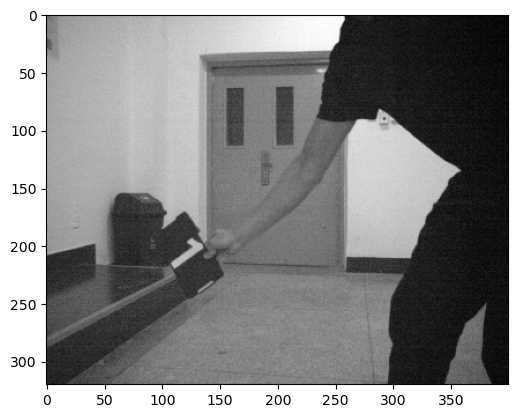

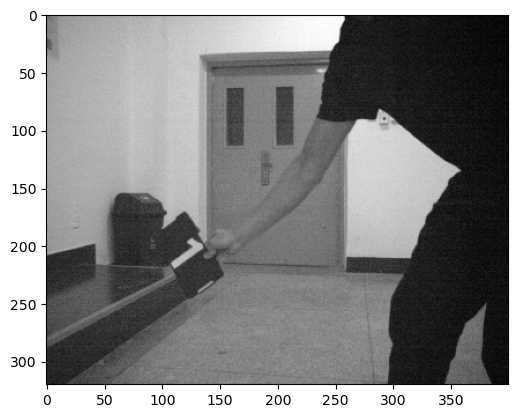

In [13]:
import cv2
import numpy as np
import need
image=cv2.imread('D:/pycv/lessons/res/img3.png')
image=cv2.resize(image,(400,int(400 * image.shape[0] / image.shape[1])))
#转换为灰度图像
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#灰度拉伸
#如果一幅图像的灰度集中在较暗的区域而导致图像偏暗，可以用灰度拉伸功能来拉伸(斜率>1)物体灰度区间以改善图像；
# 同样如果图像灰度集中在较亮的区域而导致图像偏亮，也可以用灰度拉伸功能来压缩(斜率<1)物体灰度区间以改善图像质量
stretchedimage=need.gray_stretch(gray_image)#进行灰度拉伸，是因为可以改善图像的质量
need.plt_show(gray_image)
need.plt_show(stretchedimage)


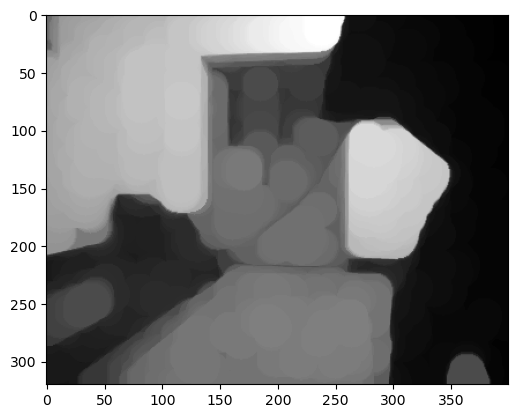

In [14]:
#构造卷积核
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
#开运算
openingimage=cv2.morphologyEx(stretchedimage,cv2.MORPH_OPEN,kernel)
need.plt_show(openingimage)

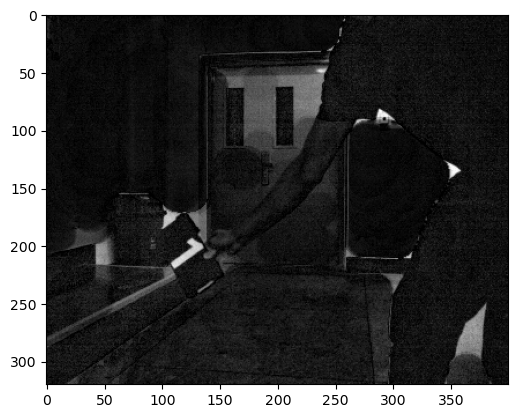

In [15]:

#获取差分图，两幅图像做差  cv2.absdiff('图像1','图像2')
strtimage=cv2.absdiff(stretchedimage,openingimage)
need.plt_show(strtimage)

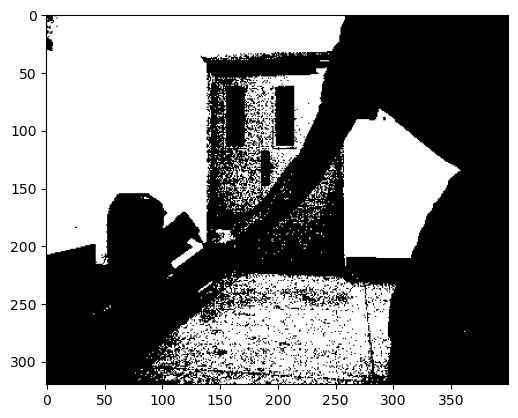

In [16]:

#图像二值化
binaryimage=need.image_binary(stretchedimage)
need.plt_show(binaryimage)

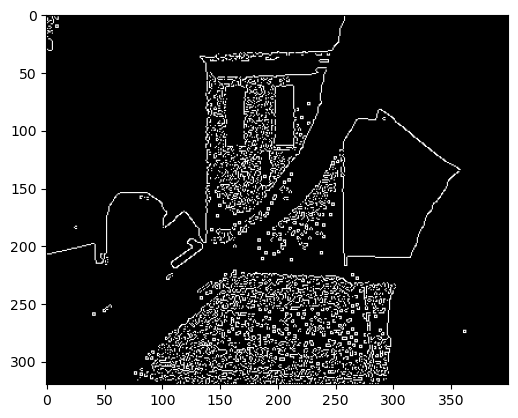

In [17]:

#canny边缘检测
canny=cv2.Canny(binaryimage,binaryimage.shape[0],binaryimage.shape[1])
need.plt_show(canny)

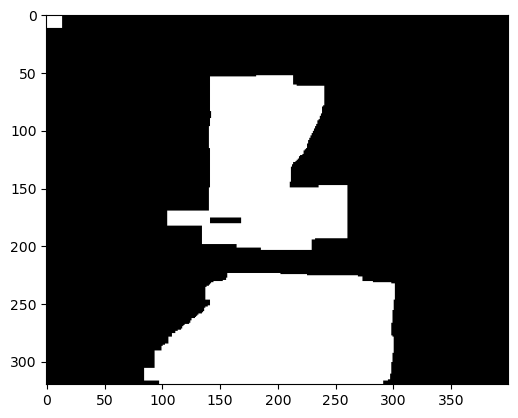

In [18]:

#5 24效果最好
kernel=np.ones((5,24),np.uint8)
closingimage=cv2.morphologyEx(canny,cv2.MORPH_CLOSE,kernel)
openingimage=cv2.morphologyEx(closingimage,cv2.MORPH_OPEN,kernel)
#11 6的效果最好
kernel=np.ones((11,6),np.uint8)
openingimage=cv2.morphologyEx(openingimage,cv2.MORPH_OPEN,kernel)
need.plt_show(openingimage)